In [1]:
include("../lna.jl")
include("../functions.jl")

log_likelihood_whole_cell (generic function with 2 methods)

## Comparing the canonical model to the model with bound ribosomes

In [178]:
ps_rib_bound_int = [6000000, 1.0, 10.0, 1.5, 10.0, 1.0, 20.0, 1.0, 1.0, 8, 1.0, 1.0]
prob = LNAProblem(rn_rib_bound_int, zeros(length(species(rn_rib_bound_int))), ps_rib_bound_int)
    
sol = solve(prob)

lnameans_rib_int = mean(sol)
lnacovs_rib_int = cov(sol)
ps_rib = ps_rib_bound_f(ps_rib_bound_int, lnameans_rib_int)

9-element Vector{Float64}:
      6.0e6
      1.0
     10.0
 545455.1363661363
      9.090909090909092
      1.0
      8.00001666664861
      1.0
      1.0

## Increasing k3

In [187]:
rn_rib = rn_rib_bound_f()
rn_can = rn_can_f()

k3s = 0.1:1.:200
ff_can = zeros(length(k3s))
ff_rib = zeros(length(ff_can))
ratios = zeros(length(ff_can))
for i in 1:length(k3s)
    ps_rib = [10.0, 0.1, 1.0, 0.2, k3s[i], 0.1, 1.0, 0.1, 0.1];
    prob = LNAProblem(rn_rib, zeros(length(species(rn_rib))), ps_rib)

    sol = solve(prob)

    lnameans_rib = mean(sol)
    lnacovs_rib = StatsBase.cov(sol)

    ps_can = ps_can_f(ps_rib, lnameans_rib)
    
    prob = LNAProblem(rn_can, zeros(length(species(rn_rib))), ps_can)
    sol = solve(prob)
    
    lnameans_can = mean(sol)
    lnacovs_can = StatsBase.cov(sol)
    
    ff_can[i] = lnacovs_can[2,2]/lnameans_can[2]
    ff_rib[i] = lnacovs_rib[3,3]/lnameans_rib[3]
    ratios[i] = lnameans_rib[3]/lnameans_rib[1]
end

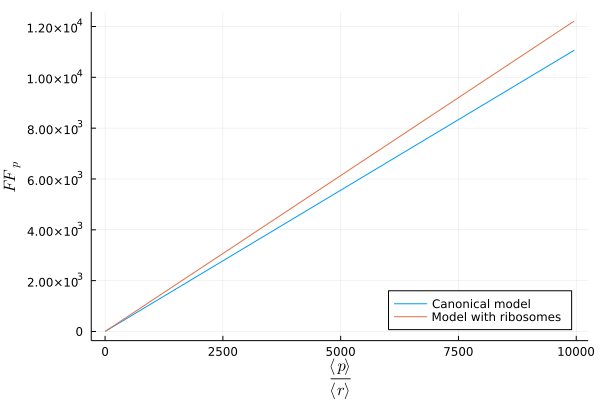

In [188]:
plot(ratios, ff_can, label="Canonical model")
plot!(ratios, ff_rib, label = "Model with ribosomes", legend=:bottomright, xlabel=L"\frac{\langle p \rangle}{\langle r \rangle}", ylabel=L"FF_p")

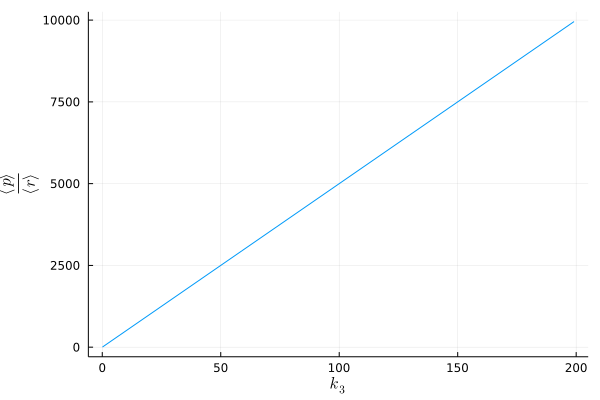

In [189]:
plot(k3s, ratios, legend=:false, ylabel = L"\frac{\langle p \rangle}{\langle r \rangle}", xlabel=L"k_3")

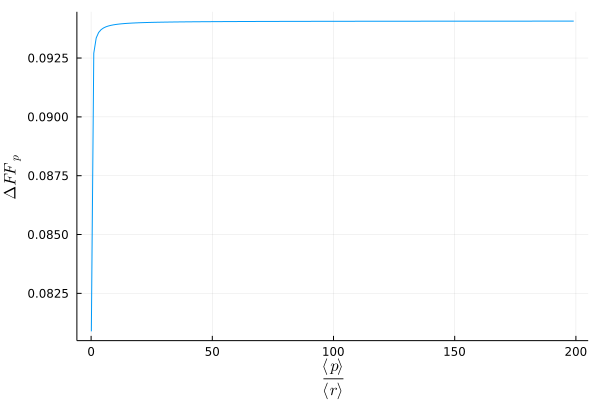

In [190]:
rel_error_FF = (ff_rib .- ff_can) ./ ff_rib

plot(k3s, rel_error_FF, legend=:false, xlabel = L"\frac{\langle p \rangle}{\langle r \rangle}", ylabel=L"\Delta FF_p")

### Using realistic values...

In [204]:
rn_rib = rn_rib_bound_f()
rn_can = rn_can_f()

k3s = 0.1:1000.:20000000
ff_can = zeros(length(k3s))
ff_rib = zeros(length(ff_can))
ratios = zeros(length(ff_can))
for i in 1:length(k3s)
    ps_rib = [6e6, 1., 10., 545455, k3s[i], 1., 8.0, 1., 1.];
    prob = LNAProblem(rn_rib, zeros(length(species(rn_rib))), ps_rib)

    sol = solve(prob)

    lnameans_rib = mean(sol)
    lnacovs_rib = StatsBase.cov(sol)

    ps_can = ps_can_f(ps_rib, lnameans_rib)
    
    prob = LNAProblem(rn_can, zeros(length(species(rn_rib))), ps_can)
    sol = solve(prob)
    
    lnameans_can = mean(sol)
    lnacovs_can = StatsBase.cov(sol)
    
    ff_can[i] = lnacovs_can[2,2]/lnameans_can[2]
    ff_rib[i] = lnacovs_rib[3,3]/lnameans_rib[3]
    ratios[i] = lnameans_rib[3]/lnameans_rib[1]
end

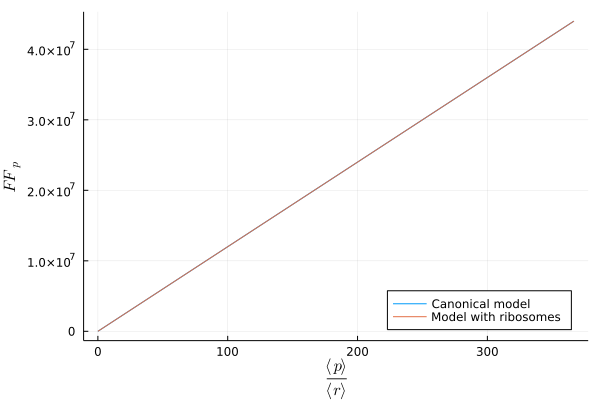

In [205]:
plot(ratios, ff_can, label="Canonical model")
plot!(ratios, ff_rib, label = "Model with ribosomes", legend=:bottomright, xlabel=L"\frac{\langle p \rangle}{\langle r \rangle}", ylabel=L"FF_p")

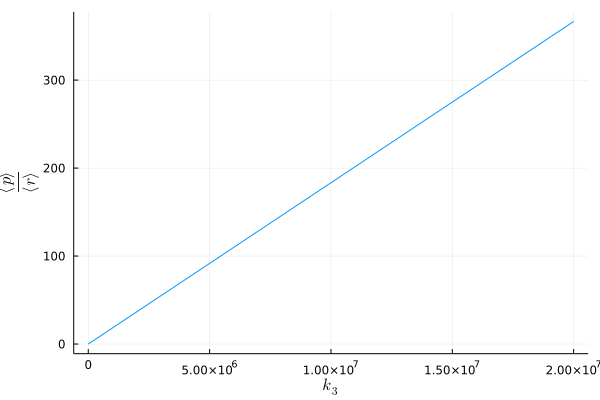

In [206]:
plot(k3s, ratios, legend=:false, ylabel = L"\frac{\langle p \rangle}{\langle r \rangle}", xlabel=L"k_3")

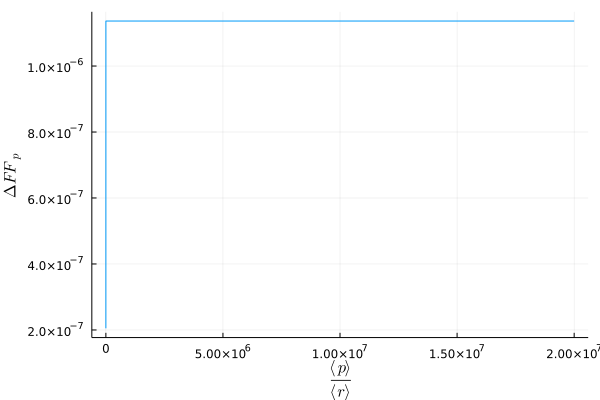

In [207]:
rel_error_FF = (ff_rib .- ff_can) ./ ff_rib

plot(k3s, rel_error_FF, legend=:false, xlabel = L"\frac{\langle p \rangle}{\langle r \rangle}", ylabel=L"\Delta FF_p")

## Confirming a case where the FF diverges.

In [110]:
ps_rib = [10.0, 0.1, 1.0, 0.2, 25, 0.1, 1.0, 0.1, 0.1]

prob = LNAProblem(rn_rib, zeros(length(species(rn_rib))), ps_rib)

sol = solve(prob)

lnameans = mean(sol)
lnacovs = StatsBase.cov(sol)

initial_values = map(Int64, map(ceil, lnameans))

prob = DiscreteProblem(rn_rib, initial_values, (0, 10000000.),  ps_rib)
jump_prob = JumpProblem(rn_rib, prob, Direct(), save_positions=(false, false))

sol = solve(jump_prob, SSAStepper(), saveat=5.0)

protein_counts_rib = map(x -> x[3], sol.u);

In [111]:
ps_can = ps_can_f(ps_rib, lnameans)

prob = LNAProblem(rn_can, zeros(length(species(rn_can))), ps_can)

sol = solve(prob)

lnameans_can = mean(sol)
lnacovs_can = StatsBase.cov(sol)

initial_values = map(Int64, map(ceil, lnameans_can))

prob = DiscreteProblem(rn_can, initial_values, (0, 10000000.),  ps_can)
jump_prob = JumpProblem(rn_can, prob, Direct(), save_positions=(false, false))

sol = solve(jump_prob, SSAStepper(), saveat=5.0)

protein_counts_can = map(x -> x[2], sol.u);

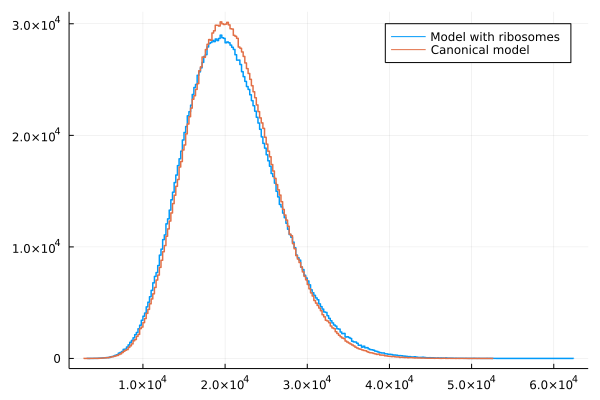

In [113]:
stephist(protein_counts_rib, linewidth=1.5, label="Model with ribosomes")
stephist!(protein_counts_can, linewidth=1.5, label="Canonical model")

In [116]:
savefig("../../data/figures-for-paper/fano-factor/model_III_and_IV_10_percent_error.svg")

In [20]:
using Serialization

f = serialize("fano_factor/protein_counts_rib.dat", protein_counts_rib)
f = serialize("fano_factor/protein_counts_can.dat", protein_counts_can)


4000008

In [21]:
(var(protein_counts_can) - var(protein_counts_rib))/var(protein_counts_rib)

-0.11424838925676598

# Comparing with competition to without

In [55]:
rn_rib_bound_int = rn_rib_bound_int_f()
#rn_rib_bound = rn_rib_bound_f()

Model ##ReactionSystem#294 with 12 equations
States (5):
  r(t)
  m(t)
  rs(t)
  p(t)
  rb(t)
Parameters (12):
  k1
  k2
  k3
  k4
  k5
  k6
⋮

In [169]:
ps_rib_bound_int = [6000000, 1.0, 10.0, 1.5, 10.0, 1.0, 20.0, 1.0, 1.0, 8, 1.0, 1.0]
prob = LNAProblem(rn_rib_bound_int, zeros(length(species(rn_rib_bound_int))), ps_rib_bound_int)
    
sol = solve(prob)

lnameans_rib_int = mean(sol)
lnacovs_rib_int = cov(sol)

5×5 Matrix{Float64}:
  1.2e6       -3.22045e-6   -1.36392    -7.02619        1.45486
 -3.22045e-6   1.83334e-5    0.0         0.000191666   -6.36512e-6
 -1.36392      0.0           9.99997    99.9995        -3.63712
 -7.02619      0.000191666  99.9995   2199.99         -42.984
  1.45486     -6.36512e-6   -3.63712   -42.984          4.8e6

In [170]:
lnameans_rib_int

u: 5-element Vector{Float64}:
   1.1999980000055e6
   1.8333313472159734e-5
   9.999972500029804
 199.9994500005961
   4.799992000022e6

In [171]:
species(rn_rib_bound_int)

5-element Vector{Term{Real, Base.ImmutableDict{DataType, Any}}}:
 r(t)
 m(t)
 rs(t)
 p(t)
 rb(t)

In [172]:
lnameans_rib_int[1]/(lnameans_rib_int[1]+lnameans_rib_int[5])

0.19999999999999998

This parameter set has around 20% of 6E6 ribosomes available for translation. It also has around 10 mRNA species and 200 protein copies which is not unreasonable when comparing to the Schwannhauser data set.

In [60]:
prob = LNAProblem(rn_rib_bound, zeros(length(species(rn_rib_bound))), ps_rib_bound_f(ps_rib_bound_int, lnameans_rib_int))
sol = solve(prob)

lnameans_rib = mean(sol)
lnacovs_rib = cov(sol)

4×4 Matrix{Float64}:
  1.2e6        0.0            27.2726       -4.65661e-10
  0.0          1.83333e-5      0.000366665   0.0
 27.2726       0.000366665  4199.97         72.7271
 -4.65661e-10  0.0            72.7271        4.8e6

In [61]:
lnameans_rib

u: 4-element Vector{Float64}:
   1.1999980000055002e6
   1.8333313472159714e-5
 199.99945000063764
   4.800001999994501e6

In [62]:
species(rn_rib)

4-element Vector{Term{Real, Base.ImmutableDict{DataType, Any}}}:
 r(t)
 m(t)
 p(t)
 rb(t)

In this model the number of free mRNA is very small. This is fine since the actual number of free mRNA will be small anyway.

We now want to do something similar to before where we vary a parameter and see how the FF changes.

In [146]:
rn_rib_bound_int = rn_rib_bound_int_f()
rn_rib_bound = rn_rib_bound_f()

k3s = 0.00001:.00001:0.05
ff_rib = zeros(length(k3s))
ff_rib_int = zeros(length(ff_rib))
ratios = zeros(length(ff_rib))
proteins = zeros(length(ff_rib))

for i in 1:length(k3s)
    ps_rib_bound_int = [6000000, 1.0, 10.0, 1.5, k3s[i], 1.0/k3s[i], 20.0/k3s[i], 1.0, 1.0, 8, 1.0, 1.0]
    prob = LNAProblem(rn_rib_bound_int, zeros(length(species(rn_rib_bound_int))), ps_rib_bound_int)

    sol = solve(prob)

    lnameans_rib_int = mean(sol)
    lnacovs_rib_int = StatsBase.cov(sol)

    ps_rib = ps_rib_bound_f(ps_rib_bound_int, lnameans_rib_int)
    
    prob = LNAProblem(rn_rib, zeros(length(species(rn_rib))), ps_rib)
    sol = solve(prob)
    
    lnameans_rib = mean(sol)
    lnacovs_rib = StatsBase.cov(sol)
    
    ff_rib[i] = lnacovs_rib[3,3]/lnameans_rib[3]
    ff_rib_int[i] = lnacovs_rib_int[4,4]/lnameans_rib_int[4]
    ratios[i] = lnameans_rib[3]/lnameans_rib[1]
    proteins[i] = lnameans_rib[3]
end

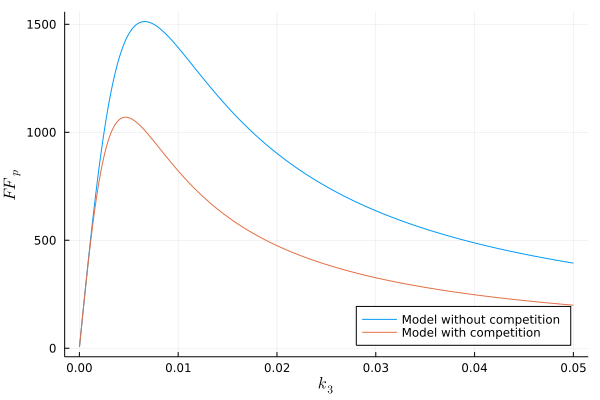

In [147]:
plot(k3s, ff_rib, label="Model without competition")
plot!(k3s, ff_rib_int, label = "Model with competition", legend=:bottomright, xlabel=L"k_3", ylabel=L"FF_p")

In [148]:
savefig("../../data/figures-for-paper/fano-factor/model_II_and_III_fano_factor_comparison_k3_increase_k5_decrease.svg")

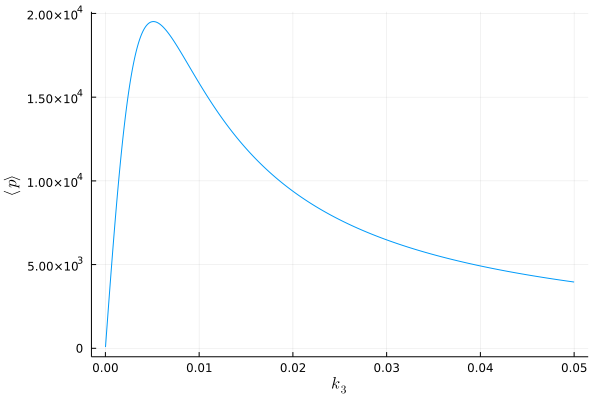

In [149]:
plot(k3s, proteins, xlabel = L"k_3", ylabel = L"\langle p \rangle", legend=false)

In [150]:
savefig("../../data/figures-for-paper/fano-factor/model_II_and_III_number_of_proteins_k3_increase_k5_decrease.svg")

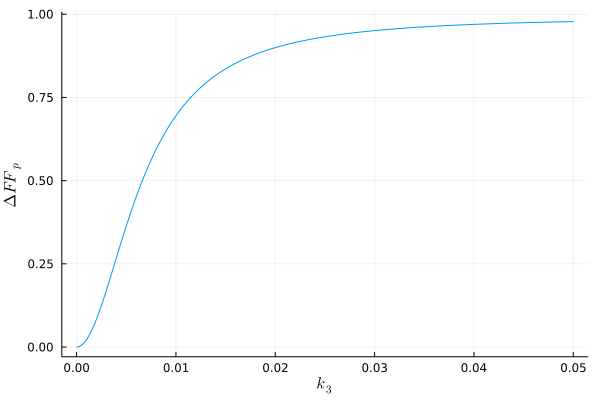

In [155]:
plot(k3s, abs.((ff_rib_int .- ff_rib) ./ ff_rib_int), label = false, xlabel=L"k_3", ylabel=L" \Delta FF_p")

In [156]:
savefig("../../data/figures-for-paper/fano-factor/model_II_and_III_fano_factor_error_k3_increase_k5_decrease.svg")

The binding rate should be dependent on the number of ribosomes.

In [157]:
rn_rib_bound_int = rn_rib_bound_int_f()
rn_rib_bound = rn_rib_bound_f()

k3s = 0.00001:.00001:0.01
ff_rib = zeros(length(k3s))
ff_rib_int = zeros(length(ff_rib))
ratios = zeros(length(ff_rib))
proteins = zeros(length(ff_rib))

for i in 1:length(k3s)
    ps_rib_bound_int = [6000000, 1.0, 10.0, 1.5, k3s[i], 1.0, 20.0, 1.0, 1.0, 8, 1.0, 1.0]
    prob = LNAProblem(rn_rib_bound_int, zeros(length(species(rn_rib_bound_int))), ps_rib_bound_int)

    sol = solve(prob)

    lnameans_rib_int = mean(sol)
    lnacovs_rib_int = StatsBase.cov(sol)

    ps_rib = ps_rib_bound_f(ps_rib_bound_int, lnameans_rib_int)
    
    prob = LNAProblem(rn_rib, zeros(length(species(rn_rib))), ps_rib)
    sol = solve(prob)
    
    lnameans_rib = mean(sol)
    lnacovs_rib = StatsBase.cov(sol)
    
    ff_rib[i] = lnacovs_rib[3,3]/lnameans_rib[3]
    ff_rib_int[i] = lnacovs_rib_int[4,4]/lnameans_rib_int[4]
    ratios[i] = lnameans_rib[3]/lnameans_rib[1]
    proteins[i] = lnameans_rib[3]
end

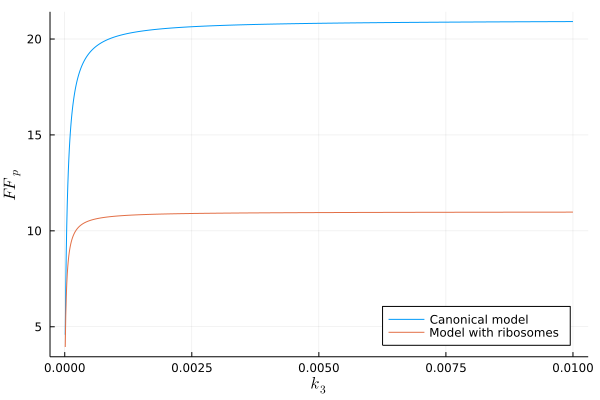

In [158]:
plot(k3s, ff_rib, label="Canonical model")
plot!(k3s, ff_rib_int, label = "Model with ribosomes", legend=:bottomright, xlabel=L"k_3", ylabel=L"FF_p")

In [159]:
savefig("../../data/figures-for-paper/fano-factor/model_II_and_III_fano_factor_comparison_k3_increase.svg")

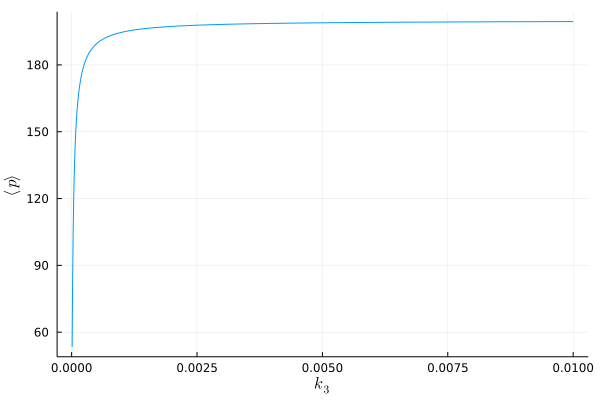

In [160]:
plot(k3s, proteins, xlabel = L"k_3", ylabel = L"\langle p \rangle", legend=false)

In [161]:
savefig("../../data/figures-for-paper/fano-factor/model_II_and_III_number_of_proteins_k3_increase.svg")

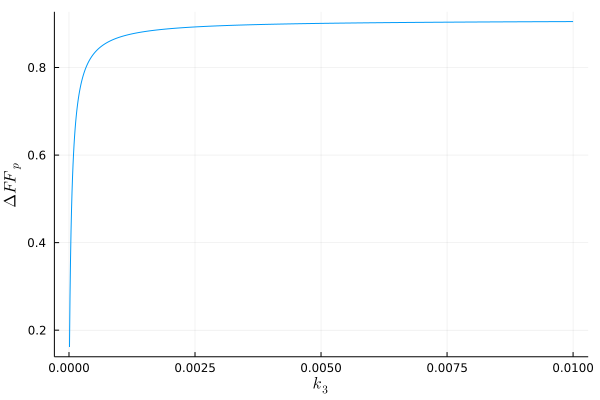

In [162]:
plot(k3s, abs.((ff_rib_int .- ff_rib) ./ ff_rib_int), label = false, xlabel=L"k_3", ylabel=L" \Delta FF_p")

In [163]:
savefig("../../data/figures-for-paper/fano-factor/model_II_and_III_fano_factor_error_k3_increase.svg")

# Comparing many genes to one